# Lab 4: Part Of Speech

Consider Treebank corpus.

- Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

- Evaluate the resulting 24 models using sentences from 3001.

- Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).

Which model would you select? Justify the answer.

Summary of the four methods compared:

1. **Perceptron-Based POS Tagging:** 
   - Machine Learning based
   - token-level classification
   - Linear model

2. **CRF (Conditional Random Fields):**
   - Conditional Random Fields (CRF) are probabilistic models used for sequential labeling tasks, including POS tagging.
   - CRFs model the conditional probability of a sequence of labels given input observations.
   - They consider dependencies between labels, making them effective for capturing complex relationships in sequential data.
   - Training a CRF involves estimating parameters to maximize the likelihood of observed sequences.

3. **TnT Models (Trigrams 'n' Tags):**
   - TnT models are used for POS tagging and focus on trigrams, considering two previous POS tags and the current word.
   - They use a transition table to store probabilities of label transitions.
   - TnT models are known for their simplicity and effectiveness in POS tagging tasks, although they may not capture complex dependencies as well as CRFs or neural models.

4. **Hidden Markov Models (HMMs):**
   - Hidden Markov Models (HMMs) are probabilistic models used for modeling sequences of hidden states and observed data.
   - They consist of hidden states, state transitions, and emission probabilities for observed data.
   - They are particularly effective when modeling sequences with temporal dependencies.

# Imports and Data Load

In [11]:
import dill
import nltk
nltk.download('treebank')

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


def LID(fd, bins):
  return nltk.probability.LidstoneProbDist(fd, 0.1, bins)

def create_folder(path, prefix="models/"):
    if not os.path.exists(prefix+path):
        os.makedirs(prefix+path)
    return prefix+path

def save_model(model, path):
    with open(path, 'wb') as f:
        dill.dump(model, f)


def load_model(path):
    with open(path, 'rb') as f:
        return dill.load(f)
    
RETRAIN = True
TEST_SIZE = 3000

data = nltk.corpus.treebank.tagged_sents()
test_data = data[-TEST_SIZE:]
len(data)

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


3914

# Models Training

The following code trains the models and saves them in the models folder. For each of them, the following metrics are tracked:

- **Accuracy**: How well the model performs on the test set after training (higher is better)
- **Training Time**: How long it takes to train the model (lower is better)
- **Evaluation Time**: How long it takes to evaluate the model. It's strictly correlated to inference time (lower is better).

In [12]:
ls_train_size = [500, 1000, 1500, 2000, 2500, 3000]
# ls_train_size = [500]

print("START TRAINING...")
print("\nHMMs")
hmms_train = []
hmms_times = []
hmms_eval = []
hmms_eval_times = []

for size in ls_train_size:
  print("Training HMM for size", size)
  start = time.time()
  trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()

  model_path = create_folder("hmm") + "/" + str(size) + ".dill"

  if RETRAIN:
    hmm_model = trainer.train_supervised(data[:size])
    save_model(hmm_model, model_path)
  else:
    hmm_model = load_model(model_path)

  hmms_train.append(hmm_model)
  hmms_times.append(time.time() - start)

  try:
    start = time.time()
    hmms_eval.append(hmms_train[-1].accuracy(test_data))
    hmms_eval_times.append(time.time() - start)
  except:
    hmms_eval.append(0)
    hmms_eval_times.append(0)

# print(list(zip(ls_train_size, hmms_times, hmms_eval)))

print("\nTNT")
tnt_train = []
tnt_times = []
tnt_eval = []
tnt_eval_times = []

for size in ls_train_size:
  print("Training TNT for size", size)
  start = time.time()
  tnt_model = nltk.tag.tnt.TnT()

  model_path = create_folder("tnt") + "/" + str(size) + ".dill"

  if RETRAIN:
    tnt_model.train(data[:size])
    save_model(tnt_model, model_path)
  else:
    tnt_model = load_model(model_path)

  tnt_train.append(tnt_model)
  tnt_times.append(time.time() - start)

  try:
    start = time.time()
    tnt_eval.append(tnt_train[-1].accuracy(test_data))
    tnt_eval_times.append(time.time() - start)
  except:
    tnt_eval.append(0)
    tnt_eval_times.append(0)

# print(list(zip(ls_train_size, tnt_times, tnt_eval)))

print("\nPERCEPTRON")
per_train = []
per_times = []
per_eval = []
per_eval_times = []

for size in ls_train_size:
  print("Training Perceptron for size", size)
  start = time.time()
  per_model = nltk.tag.perceptron.PerceptronTagger(load=False)

  model_path = create_folder("mlp") + "/" + str(size) + ".dill"

  if RETRAIN:
    per_model.train(data[:size])
    save_model(per_model, model_path)
  else:
    per_model = load_model(model_path)

  per_train.append(per_model)
  per_times.append(time.time() - start)

  try:
    start = time.time()
    per_eval.append(per_train[-1].accuracy(test_data))
    per_eval_times.append(time.time() - start)
  except:
    per_eval.append(0)
    per_eval_times.append(0)


# print(list(zip(ls_train_size, per_times, per_eval)))

print("\nCRF")

crf_train = []
crf_times = []
crf_eval = []
crf_eval_times = []

for size in ls_train_size:
  print("Training CRF for size", size)
  start = time.time()
  crf_model = nltk.tag.CRFTagger()
  model_path = create_folder("crf") + "/" + str(size) + ".dill"

  if RETRAIN:
    crf_model.train(data[:size], model_file=model_path)
  else:
    crf_model = load_model(model_path)
    
  crf_train.append(crf_model)
  crf_times.append(time.time() - start)
  try:
    start = time.time()
    crf_eval.append(crf_train[-1].accuracy(test_data))
    crf_eval_times.append(time.time() - start)
  except:
    crf_eval.append(0)
    crf_eval_times.append(0)

# print(list(zip(ls_train_size, crf_times, crf_eval)))


START TRAINING...

HMMs
Training HMM for size 500


c:\Users\alber\Documents\GitHub\UPC_MasterArtificialIntelligence\.venv\lib\site-packages\nltk\tag\hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
c:\Users\alber\Documents\GitHub\UPC_MasterArtificialIntelligence\.venv\lib\site-packages\nltk\tag\hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
c:\Users\alber\Documents\GitHub\UPC_MasterArtificialIntelligence\.venv\lib\site-packages\nltk\tag\hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
c:\Users\alber\Documents\GitHub\UPC_MasterArtificialIntelligence\.venv\lib\site-packages\nltk\tag\hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


Training HMM for size 1000
Training HMM for size 1500
Training HMM for size 2000
Training HMM for size 2500
Training HMM for size 3000

TNT
Training TNT for size 500
Training TNT for size 1000
Training TNT for size 1500
Training TNT for size 2000
Training TNT for size 2500
Training TNT for size 3000

PERCEPTRON
Training Perceptron for size 500
Training Perceptron for size 1000
Training Perceptron for size 1500
Training Perceptron for size 2000
Training Perceptron for size 2500
Training Perceptron for size 3000

CRF
Training CRF for size 500
Training CRF for size 1000
Training CRF for size 1500
Training CRF for size 2000
Training CRF for size 2500
Training CRF for size 3000


# Models Evaluation and Analysis

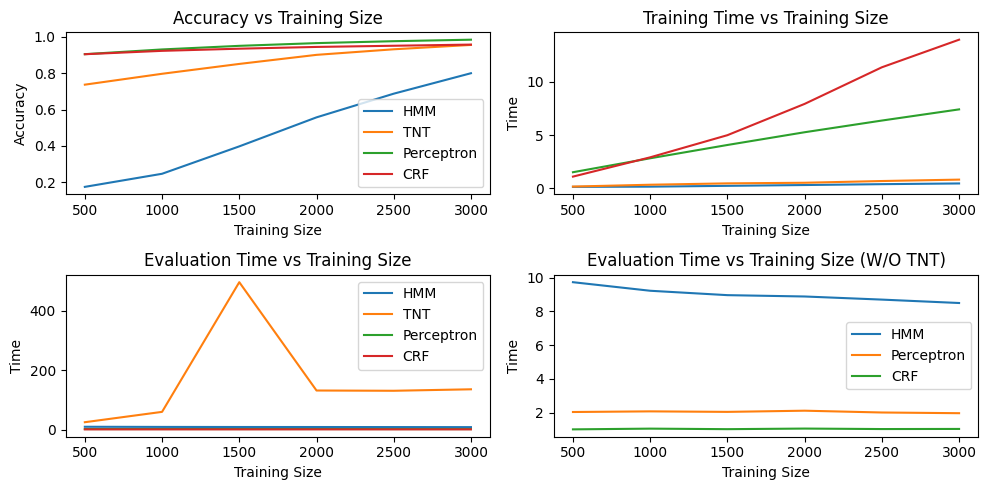

In [49]:
# for each model, plot the accuracy vs training size and time vs training size
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(ls_train_size, hmms_eval, label="HMM")
plt.plot(ls_train_size, tnt_eval, label="TNT")
plt.plot(ls_train_size, per_eval, label="Perceptron")
plt.plot(ls_train_size, crf_eval, label="CRF")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training Size")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(ls_train_size, hmms_times, label="HMM")
plt.plot(ls_train_size, tnt_times, label="TNT")
plt.plot(ls_train_size, per_times, label="Perceptron")
plt.plot(ls_train_size, crf_times, label="CRF")

plt.xlabel("Training Size")
plt.ylabel("Time")
plt.title("Training Time vs Training Size")

plt.subplot(2, 2, 3)
plt.plot(ls_train_size, hmms_eval_times, label="HMM")
plt.plot(ls_train_size, tnt_eval_times, label="TNT")
plt.plot(ls_train_size, per_eval_times, label="Perceptron")
plt.plot(ls_train_size, crf_eval_times, label="CRF")

plt.xlabel("Training Size")
plt.ylabel("Time")
plt.title("Evaluation Time vs Training Size")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(ls_train_size, hmms_eval_times, label="HMM")
# plt.plot(ls_train_size, tnt_eval_time, label="TNT")
plt.plot(ls_train_size, per_eval_times, label="Perceptron")
plt.plot(ls_train_size, crf_eval_times, label="CRF")

plt.xlabel("Training Size")
plt.ylabel("Time")
plt.title("Evaluation Time vs Training Size (W/O TNT)")

plt.legend()
plt.tight_layout()
plt.show()

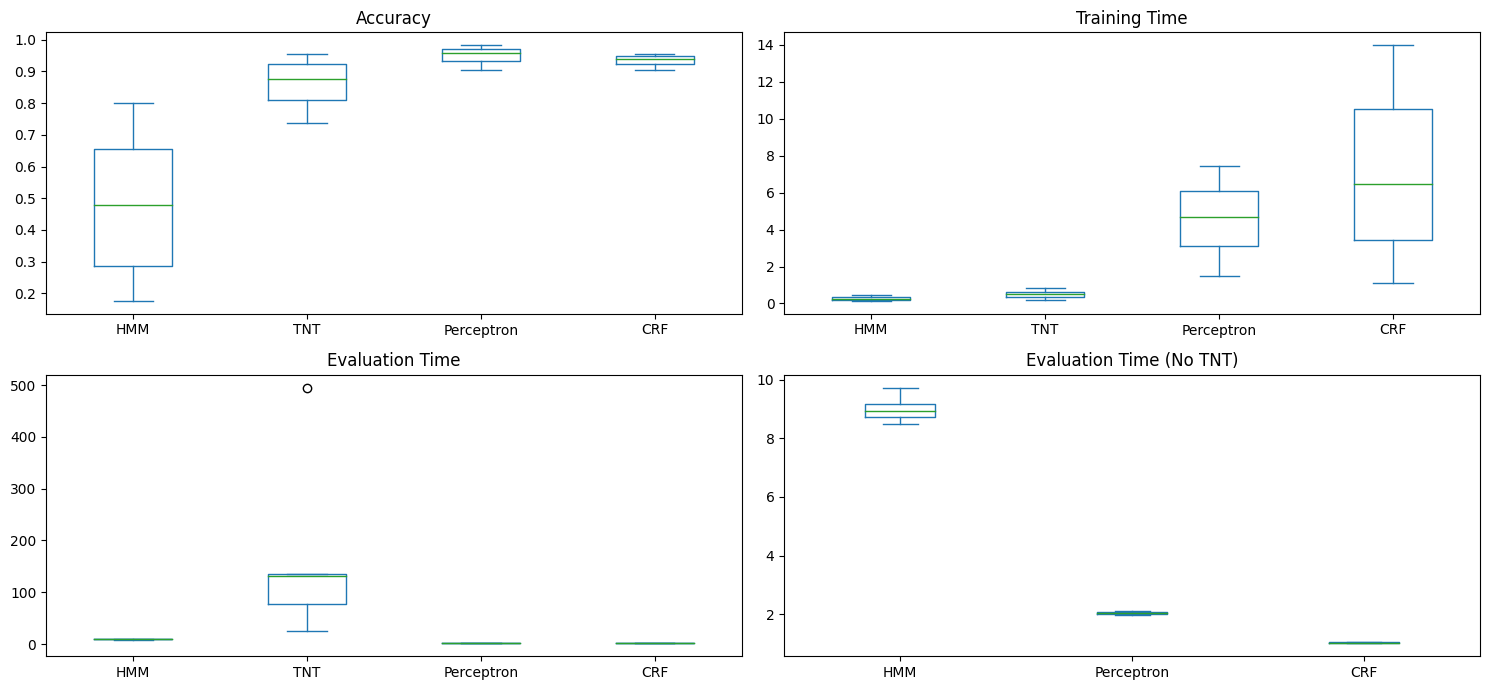

In [48]:
df_acc = pd.DataFrame(np.array([hmms_eval, tnt_eval, per_eval, crf_eval]).T, columns=["HMM", "TNT", "Perceptron", "CRF"])
df_acc.index = ls_train_size

df_time = pd.DataFrame(np.array([hmms_times, tnt_times, per_times, crf_times]).T, columns=["HMM", "TNT", "Perceptron", "CRF"])
df_time.index = ls_train_size

df_eval_time = pd.DataFrame(np.array([hmms_eval_times, tnt_eval_times, per_eval_times, crf_eval_times]).T, columns=["HMM", "TNT", "Perceptron", "CRF"])
df_eval_time.index = ls_train_size

fig, ax = plt.subplots(2, 2, figsize=(15, 7))
df_acc.plot.box(title="Accuracy", ax=ax[0, 0])

df_time.plot.box(title="Training Time", ax=ax[0, 1])
df_eval_time.plot.box(title="Evaluation Time", ax=ax[1, 0])
df_eval_time.drop(columns=['TNT']).plot.box(title="Evaluation Time (No TNT)", ax=ax[1, 1])

plt.tight_layout()


# Results Analysis

From previous graphics, the following information can be extracted:

- Perceptron and CRF models have a better accuracy than HMM and TnT models even with small training sizes. However, they have longer training times in general. This  is something common in ML models.

- HMM and TnT models have shorter training times but longer inference times. However, they have a lower accuracy but it increases quite fast with the training set size.

- Between Perceptron and CRF models, the difference of accuracies is almost negligible. However, the training time of the CRF model is much longer than the Perceptron model when the training size increases.

- Between HMM and TnT models, TnT models outperform HMM models in terms of accuracy but this difference seems to decrease as the training size increases. However, the inference time of TnT models is much longer than HMM models and less stable.

# Conclussions

The choice of the algorithm depends on the task which wants to be accomplished.

In this case, we would choose perceptron because of its performance in comparison to the other models. CRF models could be a good option too but its training times increase considerably with training times. In general, CRF models can capture complex dependencies better than perceptron models but in this situation, it's enough with a linear classifier.

HMM model, as it's based on bigrams, isn't able to capture complex relationships for POS tagging. It would need larger training sets to improve its performance. TnT models are a good option for POS tagging but they are much slower on inference than ML models and they don't perform as well as them.